In [6]:
import scipy.misc

def prob_buckets(p, n):
    """
    return the probability of 0 heads through n heads
    """
    l = [0] * (n+1)
    for k in range(n+1):
        l[k] = scipy.misc.comb(n, k) * (p**k) * (1-p)**(n-k)
    return l
    

In [21]:
def comp_buckets(ba, bb):
    """
    What is the probability that bb has more heads than ba
    
    If number of heads is equal take a random guess and have 0.5
    chance of guessing right
    """
    total = 0
    for i in range(1, len(bb)):
        for j in range(0, i):
            total += ba[j] * bb[i]
    
    for i in range(0, len(bb)):
        total += 0.5 * ba[i] * bb[i]
    return total

In [29]:
p = 0.5
i = 0
probs = []
while p < 0.95:
    i += 1
    ba = prob_buckets(0.5, i)
    bb = prob_buckets(0.6, i)
    p = comp_buckets(ba, bb)
    probs.append(p)
    if i % 10 == 0:
        print(i, p)

10 0.67181132375
20 0.736711079686
30 0.781481397956
40 0.815512354857
50 0.842569899943
60 0.86465473845
70 0.882994260669
80 0.898410787126
90 0.911488826186
100 0.922661720505
110 0.932260939364
120 0.94054616542
130 0.947724695335


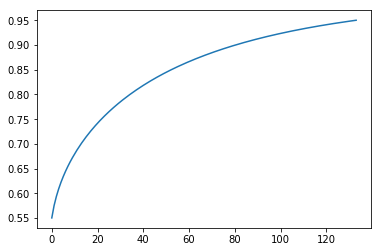

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(probs)

In [49]:
print("%d flips for 0.6" % i)

134 flips for 0.6


In [44]:
def solve_p(p2):
    p = 0.5
    i = 0
    while p < 0.95:
        i += 1
        ba = prob_buckets(0.5, i)
        bb = prob_buckets(p2, i)
        p = comp_buckets(ba, bb)
    return i
      

In [50]:
times = []
ps = []
t_start = 0.60
while t_start < 1:
    times.append(solve_p(t_start))
    ps.append(t_start)
    t_start += 0.01

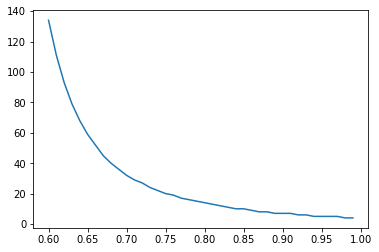

In [52]:
""" 
This is what the number of flips to get 0.95 looks like for
Different probabilities
"""
plt.plot(ps, times)